In [1]:
import seaborn as sns
import os
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_ideology = pd.read_csv("/shared/2/projects/framing/results/frame_building_ideology/predict_frame_from_ideology_11-14_corrected_p.tsv",sep='\t')
df_country = pd.read_csv("/shared/2/projects/framing/results/frame_building_country/predict_frame_from_country_11-14_corrected_p.tsv",sep='\t')


In [228]:
issue_general_frames = ['Capacity and Resources','Crime and Punishment', 'Cultural Identity', 'Economic',
                        'External Regulation and Reputation', 'Fairness and Equality',
                        'Health and Safety', 'Legality, Constitutionality, Jurisdiction',
                        'Morality and Ethics', 'Policy Prescription and Evaluation',
                        'Political Factors and Implications', 'Public Sentiment',
                        'Quality of Life', 'Security and Defense']
issue_specific_frames = ['Threat: Fiscal','Threat: Jobs', 'Threat: National Cohesion', 'Threat: Public Order',
                         'Victim: Discrimination', 'Victim: Global Economy','Victim: Humanitarian', 'Victim: War',
                         'Hero: Cultural Diversity', 'Hero: Integration','Hero: Worker']
is_combined_frames = ['Hero','Victim','Threat']
narrative_frames = ['Episodic','Thematic']
frames = {}
frames['Issue-Specific'] = [s.replace(' ','.').replace(':','.') for s in issue_specific_frames]
frames['Issue-Generic'] = [s.replace(' ','.').replace(':','.') for s in issue_general_frames]
frames['Narrative'] = narrative_frames
frames['Issue-Specific-Combined'] = is_combined_frames

In [146]:
def fix_labels(frame_order):
    new_labels = []
    for label in frame_order:
        new_label = label.replace('..',': ')
        new_label = new_label.replace('.',' ')
        new_label = new_label.replace('and','&')
        if len(new_label.split()) > 3:
            new_label = ' '.join(new_label.split()[:2])
        new_labels.append(new_label)
    return new_labels
        

In [239]:
def get_label_colors(frame_order):
    label_colors = []
    for label in frame_order:
        if label in frames['Issue-Generic']:
            label_colors.append(sns.color_palette('dark')[1])
        elif label in frames['Issue-Specific']:
            label_colors.append(sns.color_palette('dark')[0])
        else:
             label_colors.append(sns.color_palette('dark')[2])
    return label_colors
    

In [711]:
#### CODE TO PLOT AUTHOR IDEOLOGY  #####

def plot_ideology(df_ideology,out_file=None):
    df_all_list = []
    for frame_type in ['Issue-Generic','Issue-Specific','Narrative']:
        df = df_ideology[df_ideology['frame'].isin(frames[frame_type])]
        df = df[df['term']=='ideology']
        df = df[df['p.corrected'] < 0.01]
        df['frame_type'] = frame_type
        df_all_list.append(df[['estimate','std.error','frame','frame_type']])

    df = pd.concat(df_all_list)
    df = df.sort_values('estimate',ascending=True)
    new_labels = fix_labels(df['frame'])
    label_colors = get_label_colors(df['frame'])

    g = sns.catplot(x='estimate',y='frame',data=df,kind='bar',
                palette='colorblind',hue='frame_type',dodge=False,aspect=1,legend=False)
    plt.errorbar(x = df['estimate'],y=range(len(df)),xerr=df['std.error'],fmt = 'none',color='black')
    ax = g.axes[0,0]
    plt.title(r'$\longleftarrow$Liberal       Conservative$\longrightarrow$',size=10,y=1)
    plt.ylabel('')
    locs, labels = plt.yticks()
    plt.yticks(locs,new_labels,size=11)
    plt.xlabel(r'$\beta$ Coefficient')
    plt.xlim([-0.65,0.65]) 
    plt.legend(loc='upper center',title='Frame Type',ncol=3,bbox_to_anchor=(0,1.2))
    #plt.legend(loc='upper right',title='Frame Type')

    for i in range(1,len(df['frame']),2):
        ax.axhspan(i-.5,i+.5,facecolor='gray',alpha=0.1,clip_on=False,xmin=-1)

    for ix,i in enumerate(ax.get_yticklabels()):
        i.set_color(label_colors[ix])

    if out_file != None:
        plt.savefig(out_file,bbox_inches='tight')
    plt.show()

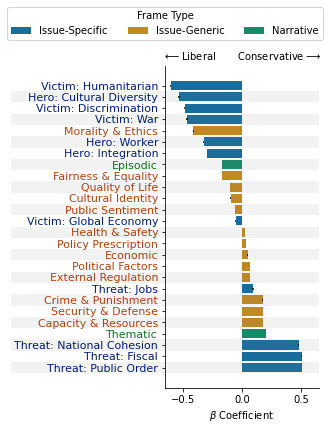

In [712]:
f_out = f'/shared/2/projects/framing/results/plots/ideology_plot_04-08-21.pdf'
plot_ideology(df_ideology,out_file=f_out)
#plot_ideology(df_ideology)

In [797]:
def plot_country(df_country,title=None,out_file=None):
    df_all_list = []
    for frame_type in ['Issue-Generic','Issue-Specific','Narrative']:
        df = df_country[df_country['frame'].isin(frames[frame_type])]
        df = df[df['p.corrected'] < 0.01]

        df = df[df['term'].isin(['countryEU','countryGB'])]
        df['frame_type'] = frame_type
        df_all_list.append(df[['estimate','std.error','frame','frame_type','term']])

    df = pd.concat(df_all_list)
    df = df.sort_values(['term','estimate'],ascending=True)

    g = sns.catplot(x='estimate',y='frame',data=df,kind='bar',row='term',
               palette='colorblind',hue='frame_type',dodge=False,height=4,aspect=1.25,legend=False,
                   sharey=False)
    ax1 = g.axes[0,0]
    ax2 = g.axes[1,0]
    df_eu = df[df['term']=='countryEU']
    df_gb = df[df['term']=='countryGB']
    ax1.errorbar(x = df_eu['estimate'],y=range(len(df_eu)),xerr=df_eu['std.error'],fmt = 'none',color='black')
    ax2.errorbar(x = df_gb['estimate'],y=range(len(df_gb)),xerr=df_gb['std.error'],fmt = 'none',color='black')
    new_labels_eu = fix_labels(df_eu['frame'])
    label_colors_eu = get_label_colors(df_eu['frame'])
    new_labels_gb = fix_labels(df_gb['frame'])
    label_colors_gb = get_label_colors(df_gb['frame'])
    
    for ax in [ax1,ax2]:
        ax.set_ylabel('')
        for ix,i in enumerate(ax.get_yticklabels()):
            if ax == ax1:
                i.set_color(label_colors_eu[ix])
            else:
                i.set_color(label_colors_gb[ix])
            if ix % 2 == 1:
                ax.axhspan(ix-.5,ix+.5,facecolor='gray',clip_on=False,xmin=-.9,alpha=0.1)
            
    ax1.set_xlabel('')
    ax2.set_xlabel(r'$\beta$ Coefficient',size=12)  
    ax1.set_yticklabels(new_labels_eu)
    ax2.set_yticklabels(new_labels_gb)
    ax1.legend(loc='upper center',title='Frame Type',ncol=3,bbox_to_anchor=(0.1,1.2))
    ax1.set_title(r'$\longleftarrow$ USA          EU $\longrightarrow$',size=12,y=.95)
    ax2.set_title(r'$\longleftarrow$ USA          UK $\longrightarrow$',size=12,y=.95)
    plt.subplots_adjust(hspace=0.05, wspace=0)


    if out_file != None:
        plt.savefig(out_file,bbox_inches='tight')
    plt.show()

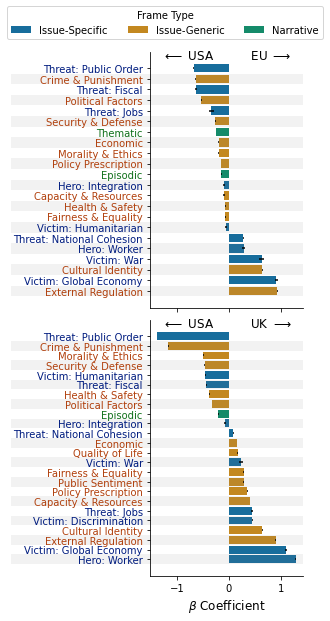

In [798]:
filename = f'/shared/2/projects/framing/results/plots/region_plot_04-08-21.pdf'
#plot_country(df_country,'countryEU',title='Log-odds of frames from US and EU authors',out_file=f_out)
plot_country(df_country,out_file=filename)

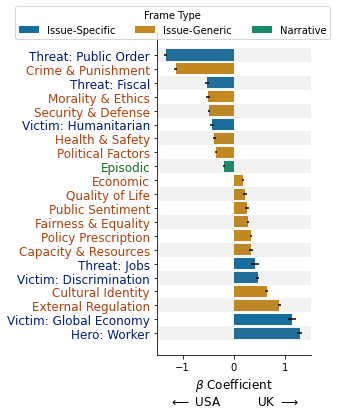

In [266]:
f_out = f'/shared/2/projects/framing/results/plots/GB_plot_04-06-21_narrow.pdf'
plot_country(df_country,'countryGB',out_file=f_out)

In [224]:
def get_sig_pos_reac_frames(reac_df):
    sig_frames = []
    for frame_type in ['Issue-Generic','Issue-Specific','Narrative']:
        df = df = reac_df[reac_df['term'].isin(frames[frame_type])]
        df = df[df['p.corrected'] < 0.05]
        #df = df[df['estimate'] > 0]
        sig_frames += list(df['term'])
    return set(sig_frames)

In [225]:
def get_order(df):
    frame_order = list(df['term'])
    print(frame_order)

In [337]:
def change_width(ax):
    all_patches = [x[1] for x in sorted([(patch.get_y(),patch) for patch in ax.patches])]
    for (i,patch) in enumerate(all_patches):
        patch.set_height(.5)
        patch.set_y(.5*(i-1))   # 0 -- -.5   1 --> 0 2 --> .5

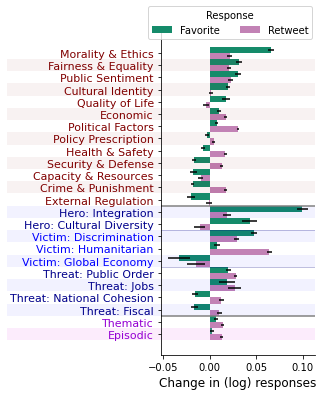

In [799]:
fav_df = pd.read_csv('/shared/2/projects/framing/results/frame_setting/favorites_3-31-21_no_ideology_nan.tsv',sep='\t')
rt_df = pd.read_csv('/shared/2/projects/framing/results/frame_setting/retweets_3-31-21_no_ideology_nan.tsv',sep='\t')
fav_df['Response'] = 'Favorite'
rt_df['Response'] = 'Retweet'
reac_df = pd.concat([fav_df,rt_df])
reac_df['term'] = [x[:-1] if x[-1]=='1' else x for x in reac_df['term']]


df_all_list = []
order = []
for frame_type in ['Issue-Generic','Issue-Specific','Narrative']:
    if frame_type == 'Issue-Specific':
        for subframe in ['Hero','Victim','Threat']:
            reac_df['term']
            df = reac_df[(reac_df['term'].str.startswith(subframe))]
            sig_frames = get_sig_pos_reac_frames(df)
            df = df[df['term'].isin(sig_frames)]
            df = df.sort_values('estimate',ascending=False)
            df_all_list.append(df)
            order += list(df[df['Response']=='Favorite'].sort_values('estimate',ascending=False)['term'])
    else:
        df = reac_df[(reac_df['term'].isin(frames[frame_type]))]
        sig_frames = get_sig_pos_reac_frames(df)
        df = df[df['term'].isin(sig_frames)]
        df = df.sort_values('estimate',ascending=False)
        df_all_list.append(df)
        order += list(df[df['Response']=='Favorite'].sort_values('estimate',ascending=False)['term'])
        
df = pd.concat(df_all_list)
df['frame_order'] = pd.Categorical(df.term, categories = order, ordered = True)
df = df.sort_values(by=['frame_order','Response'])
g = sns.catplot(x='estimate',y='term',data=df,kind='bar',aspect=1,
                palette=sns.color_palette('colorblind')[2::2],hue='Response',legend=False,
                order=order) 
ax = g.axes[0,0]
change_width(ax)

# for patch in ax.patches:
#     print(patch.get_y(),patch.get_height())

new_labels = [x for (i,x) in enumerate(fix_labels(df['term'])) if i % 2 == 0]
label_colors = get_label_colors(df['term'])
err_pos = sorted([i - 0.25 for i in range(int(len(df)/2))] + [i+0.25 for i in range(int(len(df)/2))])
plt.errorbar(x = df['estimate'],y=err_pos,xerr=df['std.error'],fmt = 'none',color='black')
#plt.title('Single Regression \n US data with ideologies \n All Frames')
plt.ylabel('')
plt.xlabel(r'Change in (log) responses',size=12)
locs, labels = plt.yticks()
plt.yticks(locs,new_labels,size=11)
plt.legend(loc='upper center',title='Response',bbox_to_anchor=(.45,1.1),ncol=2)
plt.axhline(12.5,color='gray')
plt.axhline(14.5,color='navy',alpha=.5,linewidth=.5)
plt.axhline(17.5,color='navy',alpha=.5,linewidth=.5)
plt.axhline(21.5,color='gray')




    
for i in range(1,13,2):
    ax.axhspan(i-.5,i+.5,facecolor='maroon',clip_on=False,alpha=0.05,xmin=-1)
for i in range(13,23,2):
    ax.axhspan(i-.5,i+.5,facecolor='blue',clip_on=False,alpha=0.05,xmin=-1)
# for i in range(17,22,2):
#     ax.axhspan(i-.5,i+5,facecolor='cyan',alpha=0.05)

for i in range(23,24,2):
    ax.axhspan(i-.5,i+.5,facecolor='violet',clip_on=False,xmin=-1,alpha=0.15)

[i.set_color("maroon") for i in plt.gca().get_yticklabels()[:13]]
#[i.set_color("blue") for i in plt.gca().get_yticklabels()[13:-2]]
[i.set_color("darkblue") for i in plt.gca().get_yticklabels()[13:15]]
[i.set_color("blue") for i in plt.gca().get_yticklabels()[15:18]]
[i.set_color("darkblue") for i in plt.gca().get_yticklabels()[18:22]]
[i.set_color("darkviolet") for i in plt.gca().get_yticklabels()[22:]]


plt.savefig('/shared/2/projects/framing/results/plots/response_plot_04-08-21.pdf',bbox_inches='tight')
plt.show()

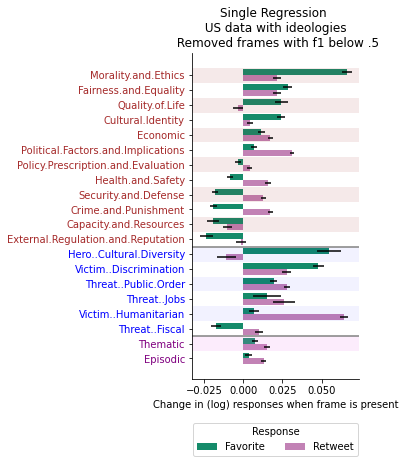

In [318]:
fav_df = pd.read_csv('/shared/2/projects/framing/results/frame_setting/favorites_3-31-21_no_ideology_nan_remove5.tsv',sep='\t')
rt_df = pd.read_csv('/shared/2/projects/framing/results/frame_setting/retweets_3-31-21_no_ideology_nan_remove5.tsv',sep='\t')
fav_df['Response'] = 'Favorite'
rt_df['Response'] = 'Retweet'
reac_df = pd.concat([fav_df,rt_df])
reac_df['term'] = [x[:-1] if x[-1]=='1' else x for x in reac_df['term']]


df_all_list = []
order = []
for frame_type in ['Issue-Generic','Issue-Specific','Narrative']:
    df = reac_df[(reac_df['term'].isin(frames[frame_type]))]
    sig_frames = get_sig_pos_reac_frames(df)
    df = df[df['term'].isin(sig_frames)]
    df = df.sort_values('estimate',ascending=False)
    df['frame_type'] = frame_type
    df_all_list.append(df)
    order += list(df[df['Response']=='Favorite'].sort_values('estimate',ascending=False)['term'])
df = pd.concat(df_all_list)
df['frame_order'] = pd.Categorical(df.term, categories = order, ordered = True)
df = df.sort_values(by=['frame_order','Response'])
plt.figure(figsize=(3,6))
ax = sns.barplot(x='estimate',y='term',data=df,
                palette=sns.color_palette('colorblind')[2::2],hue='Response',
                order=order) 
sns.despine()

err_pos = sorted([i - 0.2 for i in range(int(len(df)/2))] + [i+0.2 for i in range(int(len(df)/2))])
plt.errorbar(x = df['estimate'],y=err_pos,xerr=df['std.error'],fmt = 'none',color='black')
plt.title('Single Regression \n US data with ideologies \n Removed frames with f1 below .5')
plt.ylabel('')
plt.xlabel(f'Change in (log) responses when frame is present')
plt.legend(loc='lower center',title='Response',bbox_to_anchor=(.5,-.25),ncol=2)
plt.axhline(11.5,color='gray')
plt.axhline(17.5,color='gray')
    

for i in range(-1,11,2):
    ax.axhspan(i+.5,i+1.5,facecolor='brown',alpha=0.1)
for i in range(11,17,2):
    ax.axhspan(i+.5,i+1.5,facecolor='blue',alpha=0.05)
for i in range(17,19,2):
    ax.axhspan(i+.5,i+1.5,facecolor='violet',alpha=0.15)

[i.set_color("brown") for i in plt.gca().get_yticklabels()[:12]]
[i.set_color("blue") for i in plt.gca().get_yticklabels()[12:-2]]
[i.set_color("purple") for i in plt.gca().get_yticklabels()[-2:]]

    

#     if out_file != None:
#         plt.savefig(out_file,ncol=2,bbox_inches='tight')
plt.show()

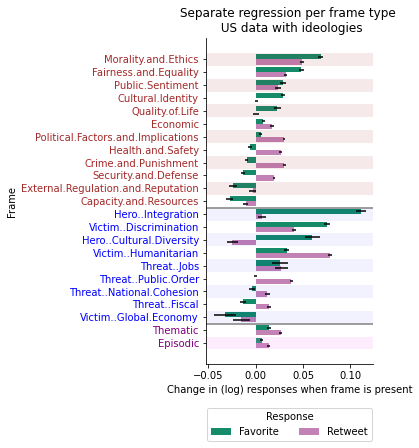

In [76]:
reac_dfs = []
for frame_type in ['generic','specific','narrative']:
    for response in ['Favorite','Retweet']:
        filename = f'/shared/2/projects/framing/results/frame_setting/{response.lower()}s_3-31-21_{frame_type}.tsv'
        df = pd.read_csv(filename,sep='\t')
        df['Response'] = response
        reac_dfs.append(df)

reac_df = pd.concat(reac_dfs)
reac_df['term'] = [x[:-1] if x[-1]=='1' else x for x in reac_df['term']]

df_all_list = []
order = []
for frame_type in ['Issue-Generic','Issue-Specific','Narrative']:
    df = reac_df[(reac_df['term'].isin(frames[frame_type]))]
    sig_frames = get_sig_pos_reac_frames(df)
    df = df[df['term'].isin(sig_frames)]
    df = df.sort_values('estimate',ascending=False)
    df['frame_type'] = frame_type
    df_all_list.append(df)
    order += list(df[df['Response']=='Favorite'].sort_values('estimate',ascending=False)['term'])
df = pd.concat(df_all_list)
df['frame_order'] = pd.Categorical(df.term, categories = order, ordered = True)
df = df.sort_values(by=['frame_order','Response'])
plt.figure(figsize=(3,6))
ax = sns.barplot(x='estimate',y='term',data=df,
                palette=sns.color_palette('colorblind')[2::2],hue='Response',
                order=order) 
sns.despine()

err_pos = sorted([i - 0.2 for i in range(int(len(df)/2))] + [i+0.2 for i in range(int(len(df)/2))])
plt.errorbar(x = df['estimate'],y=err_pos,xerr=df['std.error'],fmt = 'none',color='black')
plt.title('Separate regression per frame type \n US data with ideologies')
plt.ylabel('Frame')
plt.xlabel(f'Change in (log) responses when frame is present')
plt.legend(loc='lower center',title='Response',bbox_to_anchor=(.5,-.25),ncol=2)
plt.axhline(11.5,color='gray')
plt.axhline(20.5,color='gray')
    

for i in range(-1,11,2):
    ax.axhspan(i+.5,i+1.5,facecolor='brown',alpha=0.1)
for i in range(11,21,2):
    ax.axhspan(i+.5,i+1.5,facecolor='blue',alpha=0.05)
for i in range(21,22,2):
    ax.axhspan(i+.5,i+1.5,facecolor='violet',alpha=0.15)

[i.set_color("brown") for i in plt.gca().get_yticklabels()[:12]]
[i.set_color("blue") for i in plt.gca().get_yticklabels()[12:-2]]
[i.set_color("purple") for i in plt.gca().get_yticklabels()[-2:]]
plt.show()

In [230]:
frames

{'Issue-Specific': ['Threat..Fiscal',
  'Threat..Jobs',
  'Threat..National.Cohesion',
  'Threat..Public.Order',
  'Victim..Discrimination',
  'Victim..Global.Economy',
  'Victim..Humanitarian',
  'Victim..War',
  'Hero..Cultural.Diversity',
  'Hero..Integration',
  'Hero..Worker'],
 'Issue-Generic': ['Capacity.and.Resources',
  'Crime.and.Punishment',
  'Cultural.Identity',
  'Economic',
  'External.Regulation.and.Reputation',
  'Fairness.and.Equality',
  'Health.and.Safety',
  'Legality,.Constitutionality,.Jurisdiction',
  'Morality.and.Ethics',
  'Policy.Prescription.and.Evaluation',
  'Political.Factors.and.Implications',
  'Public.Sentiment',
  'Quality.of.Life',
  'Security.and.Defense'],
 'Narrative': ['Episodic', 'Thematic'],
 'Issue-Specific-Combined': ['Hero', 'Victim', 'Threat']}

In [274]:
new_labels

['Morality & Ethics',
 'Morality & Ethics',
 'Fairness & Equality',
 'Fairness & Equality',
 'Public Sentiment',
 'Public Sentiment',
 'Cultural Identity',
 'Cultural Identity',
 'Quality of Life',
 'Quality of Life',
 'Economic',
 'Economic',
 'Political Factors',
 'Political Factors',
 'Policy Prescription',
 'Policy Prescription',
 'Health & Safety',
 'Health & Safety',
 'Security & Defense',
 'Security & Defense',
 'Capacity & Resources',
 'Capacity & Resources',
 'Crime & Punishment',
 'Crime & Punishment',
 'External Regulation',
 'External Regulation',
 'Hero: Integration',
 'Hero: Integration',
 'Victim: Discrimination',
 'Victim: Discrimination',
 'Hero: Cultural Diversity',
 'Hero: Cultural Diversity',
 'Threat: Public Order',
 'Threat: Public Order',
 'Threat: Jobs',
 'Threat: Jobs',
 'Victim: Humanitarian',
 'Victim: Humanitarian',
 'Threat: National Cohesion',
 'Threat: National Cohesion',
 'Threat: Fiscal',
 'Threat: Fiscal',
 'Victim: Global Economy',
 'Victim: Global Ec

In [285]:
reac_df['term']

1                          (Intercept)
2               Capacity.and.Resources
3                 Crime.and.Punishment
4                    Cultural.Identity
5                             Economic
                    ...               
39                            ideology
40    sd_(Intercept).date:(month:year)
41           sd_(Intercept).month:year
42                 sd_(Intercept).year
43             sd_Observation.Residual
Name: term, Length: 86, dtype: object

In [309]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

<AxesSubplot:xlabel='Change in (log) responses'>

In [813]:
df_temp = df_country[(df_country['term'].str.startswith('country'))][['term','frame','estimate']]

df_temp = df_temp.pivot(index=df_temp.frame, columns='term').reset_index()
df_temp.columns = [' '.join(col).strip() for col in df_temp.columns.values]
df_temp = df_temp[['frame','estimate countryEU','estimate countryGB']]
df_temp.columns = ['frame','GB','EU']
df_temp['frame'] = fix_labels(df_temp['frame'])
df_temp = df_temp[df_temp['frame'].isin(['Hero','Victim','Threat','Hero: Cultural Diversity'])==False]

In [814]:
df_temp

,frame,GB,EU
0,Capacity & Resources,-0.090875,0.403251
1,Crime & Punishment,-0.635299,-1.162233
2,Cultural Identity,0.640993,0.642516
3,Economic,-0.197150,0.154006
4,Episodic,-0.147099,-0.203600
5,External Regulation,0.933615,0.897583
6,Fairness & Equality,-0.067526,0.280187
7,Health & Safety,-0.069934,-0.375413
10,Hero: Integration,-0.096369,-0.073479
11,Hero: Worker,0.286857,1.286887


In [806]:
df_temp = df_country[(df_country['term'].str.startswith('country'))]
df_temp.sort_values('p.corrected')

,term,estimate,std.error,statistic,p.value,group,frame,p.corrected
227,countryGB,0.356145,0.004355,81.782169,0.000000e+00,fixed,Policy.Prescription.and.Evaluation,0.000000e+00
339,countryGB,-0.434516,0.008665,-50.145270,0.000000e+00,fixed,Threat..Fiscal,0.000000e+00
323,countryGB,-0.828722,0.004796,-172.797983,0.000000e+00,fixed,Threat,0.000000e+00
322,countryEU,-0.535641,0.007757,-69.054345,0.000000e+00,fixed,Threat,0.000000e+00
291,countryGB,-0.469237,0.005687,-82.513846,0.000000e+00,fixed,Security.and.Defense,0.000000e+00
386,countryEU,-0.674649,0.009200,-73.329477,0.000000e+00,fixed,Threat..Public.Order,0.000000e+00
387,countryGB,-1.381001,0.006705,-205.962786,0.000000e+00,fixed,Threat..Public.Order,0.000000e+00
243,countryGB,-0.325753,0.004314,-75.508544,0.000000e+00,fixed,Political.Factors.and.Implications,0.000000e+00
242,countryEU,-0.531123,0.007328,-72.478705,0.000000e+00,fixed,Political.Factors.and.Implications,0.000000e+00
211,countryGB,-0.495415,0.008632,-57.392525,0.000000e+00,fixed,Morality.and.Ethics,0.000000e+00
